In [78]:
import sys
from keras.layers import Dense,LSTM,Embedding
from keras.models import Sequential,Model
sys.path.append('../')
from src.utils import *
from src.first_and_last_touch_model import *

In [80]:
df = load_data()
df = transform_utm_columns_into_list_of_strings(df)
df = remove_none_entries(df)
df = create_touch_columns(df)

In [81]:
df

,client_uuid,revenue,utm_source,utm_medium,event_dates,event_timestamps,days_till_conversions,conversion_date,conversion_timestamp,first_touch_utm_source,last_touch_utm_source,first_touch_utm_medium,last_touch_utm_medium
0,46843260447612932,1597.00,[(direct)],[(none)],['2019-08-02'],['2019-08-02 01:36:17'],[0],2019-08-02,2019-08-02 01:36:17,None,None,None,None
1,73937596961622962,34.99,[(direct)],[(none)],['2019-07-19'],['2019-07-19 15:27:24'],[14],2019-08-02,2019-08-02 21:08:16,None,None,None,None
2,94396730975196822,35.99,[(direct)],[(none)],['2019-08-02'],['2019-08-02 09:38:21'],[0],2019-08-02,2019-08-02 09:38:21,None,None,None,None
3,125013537097955872,34.99,[(direct)],[(none)],['2019-08-02'],['2019-08-02 15:15:40'],[0],2019-08-02,2019-08-02 15:15:40,None,None,None,None
4,162607037084320552,249.99,"[synerise, facebook, (direct), (direct), syner...","[organic, cpc, (none), sms_text, organic]","['2019-07-17','2019-07-27','2019-07-27','2019-...","['2019-07-17 08:08:00','2019-07-27 08:32:10','...","[16,6,6,6,6]",2019-08-02,2019-08-02 07:38:58,synerise,synerise,organic,organic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459912,9648908184895755222,59.99,[(direct)],[(none)],['2018-12-29'],['2018-12-29 01:27:28'],[0],2018-12-29,2018-12-29 01:27:28,None,None,None,None
459913,11645035604004122502,107.89,"[google, synerise, google, (direct)]","[web_push, organic, cpc, sms_text]","['2018-12-03','2018-12-29','2018-12-29','2018-...","['2018-12-03 14:58:36','2018-12-29 00:26:18','...","[26,0,0,0]",2018-12-29,2018-12-29 00:57:40,google,google,web_push,sms_text
459914,11951134685027657952,338.00,[google],[cpc],['2018-12-29'],['2018-12-29 00:14:38'],[0],2018-12-29,2018-12-29 00:19:01,google,google,cpc,cpc
459915,17520529140506420512,102.99,"[(direct), (direct), (direct), (direct), (dire...","[(none), (none), (none), (none), (none), (none...","['2018-12-23','2018-12-23','2018-12-23','2018-...","['2018-12-23 02:15:19','2018-12-23 18:45:08','...","[6,6,6,6,5,4,3,1,1,1,0]",2018-12-29,2018-12-29 00:12:38,google,google,cpc,sms_text


In [82]:
def remove_nones(path):
    return [touch for touch in path if touch != '(none)']

def remove_none_entries(df):
    df['utm_medium'] = df['utm_medium'].apply(remove_nones)
    df = df[df.utm_medium.str.len()>0]
    return df
df = load_data()
df = remove_outliers_z_score(df, 3.5)
df = transform_utm_columns_into_list_of_strings(df)
df = remove_none_entries(df)
df

,client_uuid,revenue,utm_source,utm_medium,event_dates,event_timestamps,days_till_conversions,conversion_date,conversion_timestamp
4,162607037084320552,249.99,"[synerise, facebook, (direct), (direct), syner...","[organic, cpc, sms_text, organic]","['2019-07-17','2019-07-27','2019-07-27','2019-...","['2019-07-17 08:08:00','2019-07-27 08:32:10','...","[16,6,6,6,6]",2019-08-02,2019-08-02 07:38:58
6,245479691431714732,173.94,"[(direct), google.com, (direct), (direct)]","[referral, sms_text]","['2019-07-22','2019-07-22','2019-07-22','2019-...","['2019-07-22 07:54:41','2019-07-22 07:57:21','...","[11,11,11,11]",2019-08-02,2019-08-02 17:45:23
12,423257530869390002,274.94,"[(direct), facebook, google]","[sms_text, cpc, cpc]","['2019-05-31','2019-06-22','2019-06-22']","['2019-05-31 05:38:48','2019-06-22 05:22:16','...","[63,41,41]",2019-08-02,2019-08-02 07:41:15
17,618125321206055252,269.99,"[synerise, google, synerise, google, facebook]","[organic, web_push, organic, cpc, cpc]","['2019-07-17','2019-07-17','2019-07-19','2019-...","['2019-07-17 03:56:43','2019-07-17 03:57:26','...","[16,16,14,14,14]",2019-08-02,2019-08-02 12:44:58
21,853710216256722922,169.80,[synerise],[organic],['2019-07-23'],['2019-07-23 09:09:49'],[10],2019-08-02,2019-08-02 17:44:39
...,...,...,...,...,...,...,...,...,...
459911,9387008742826233182,345.00,"[(direct), (direct), (direct), google.com, goo...","[referral, web_push, sms_text, organic, sms_te...","['2018-11-18','2018-12-20','2018-12-27','2018-...","['2018-11-18 01:57:22','2018-12-20 17:12:57','...","[41,9,2,2,2,2,2,2,2,2,2,2,2,2,0]",2018-12-29,2018-12-29 02:48:13
459913,11645035604004122502,107.89,"[google, synerise, google, (direct)]","[web_push, organic, cpc, sms_text]","['2018-12-03','2018-12-29','2018-12-29','2018-...","['2018-12-03 14:58:36','2018-12-29 00:26:18','...","[26,0,0,0]",2018-12-29,2018-12-29 00:57:40
459914,11951134685027657952,338.00,[google],[cpc],['2018-12-29'],['2018-12-29 00:14:38'],[0],2018-12-29,2018-12-29 00:19:01
459915,17520529140506420512,102.99,"[(direct), (direct), (direct), (direct), (dire...","[cpc, sms_text]","['2018-12-23','2018-12-23','2018-12-23','2018-...","['2018-12-23 02:15:19','2018-12-23 18:45:08','...","[6,6,6,6,5,4,3,1,1,1,0]",2018-12-29,2018-12-29 00:12:38


In [83]:
df = create_utm_vectors(df, n=10)
x = df.utm_vector_source.to_list()
y = df.revenue.to_list()

In [84]:
def create_model_Dense():
    model = Sequential()
    model.add(Dense(70, activation='relu', input_shape=(70,)))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=['acc', 'mse'])
    return model

model = create_model_Dense()
model.fit(x, y, batch_size=32, epochs=5)
predicted = model.predict(x)
rmse = measure_results(df.revenue, predicted)
rmse

Epoch 1/5
8310/8310 [==============================] - 6s 692us/step - loss: 726820.9375 - acc: 1.8428e-04 - mse: 726820.9375 5s - loss: 827445.3750 -
Epoch 2/5
8310/8310 [==============================] - 6s 688us/step - loss: 714480.9375 - acc: 1.8428e-04 - mse: 714480.9375
Epoch 3/5
8310/8310 [==============================] - 6s 688us/step - loss: 714946.8125 - acc: 1.8428e-04 - mse: 714946.8125
Epoch 4/5
8310/8310 [==============================] - 6s 692us/step - loss: 715019.3125 - acc: 1.8428e-04 - mse: 715019.3125
Epoch 5/5
8310/8310 [==============================] - 6s 685us/step - loss: 715495.1875 - acc: 1.8428e-04 - mse: 715495.1875


845.2737970421434

In [75]:
rmse

874.509667262993

first_touch_utm_source:
 {'facebook': 0.14, 'facebook.com': 0.1, 'google.com': 0.09, 'bing.com': 0.1, 'synerise': 0.2, 'google': 0.37}

last_touch_utm_source:
 {'facebook': 0.12, 'facebook.com': 0.13, 'google.com': 0.11, 'bing.com': 0.14, 'synerise': 0.17, 'google': 0.32}

first_touch_utm_medium:
 {'e-mail': 0.1, 'referral': 0.24, 'web_push': 0.1, 'organic': 0.1, 'sms_text': 0.21, 'cpc': 0.25}

last_touch_utm_medium:
 {'e-mail': 0.09, 'referral': 0.34, 'web_push': 0.09, 'organic': 0.09, 'sms_text': 0.18, 'cpc': 0.21}



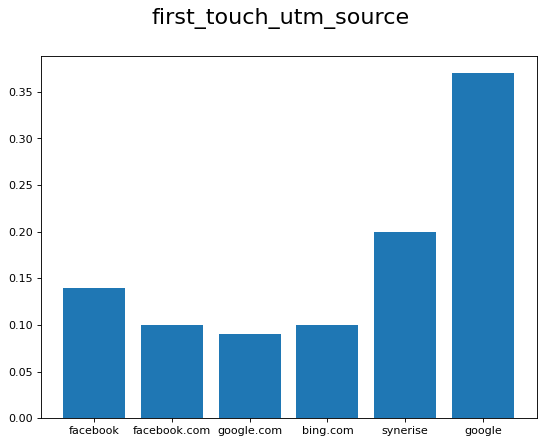

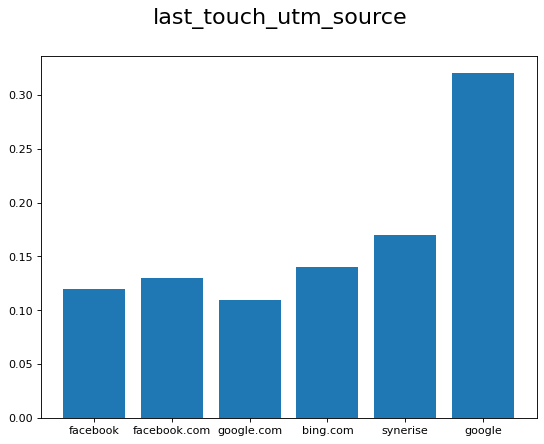

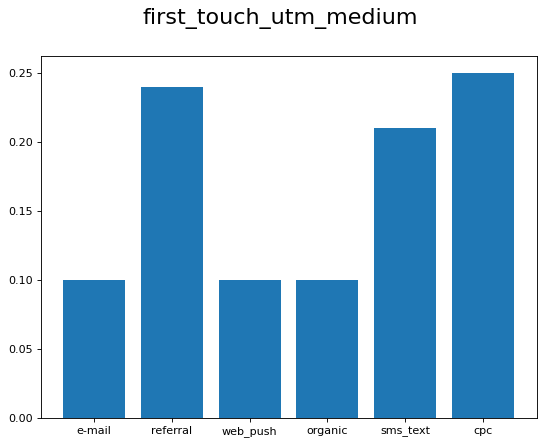

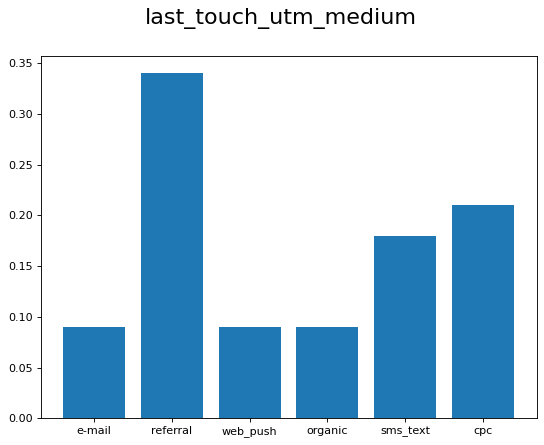

In [79]:
df = create_touch_columns(df)
# save_to_file_utm_source_and_medium_pairs_occurrence(df)  # take long time

touch_methods = ['first_touch_utm_source',
                 'last_touch_utm_source',
                 'first_touch_utm_medium',
                 'last_touch_utm_medium']

for method in touch_methods:
    impact_dict = predict_channel_impact(df, method, True)
    print(f'{method}:\n {impact_dict}\n')
    visualize_channel_impact(impact_dict, method)